In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations. and zip the 2 lists together into a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a271ae8279f616bdbded0f5d3d2a724a


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | jalu
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | inta
Processing Record 6 of Set 1 | areosa
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | sangar
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | busayra
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | robertsport
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | zhitikara
City not found. Skipping...
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | fushun
Processing Record 18 of Set 1 | kalmunai
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | smiltene
Processing Record 21 of Set 1 | nikols

Processing Record 40 of Set 4 | houma
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | albanel
Processing Record 43 of Set 4 | pangnirtung
Processing Record 44 of Set 4 | iracoubo
Processing Record 45 of Set 4 | hambantota
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | kokoda
Processing Record 49 of Set 4 | tosno
Processing Record 50 of Set 4 | steger
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | zemio
Processing Record 4 of Set 5 | borba
Processing Record 5 of Set 5 | bikin
Processing Record 6 of Set 5 | ucluelet
Processing Record 7 of Set 5 | kushmurun
Processing Record 8 of Set 5 | tiarei
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 5 | shitanjing
Processing Record 11 of Set 5 | sataua
City not found. Skipping...
Processing Record 12 of Set 5 | tessalit
Processing Record 13 of Set 5 | tucupita
Proces

Processing Record 27 of Set 8 | dingle
Processing Record 28 of Set 8 | vardo
Processing Record 29 of Set 8 | tocopilla
Processing Record 30 of Set 8 | springdale
Processing Record 31 of Set 8 | shaunavon
Processing Record 32 of Set 8 | victoria
Processing Record 33 of Set 8 | bulgan
Processing Record 34 of Set 8 | upernavik
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | akdepe
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | yumen
Processing Record 40 of Set 8 | abnub
Processing Record 41 of Set 8 | binga
Processing Record 42 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 8 | mildura
Processing Record 44 of Set 8 | ziro
Processing Record 45 of Set 8 | sept-iles
Processing Record 46 of Set 8 | chegdomyn
Processing Record 47 of Set 8 | kuching
Processing Record 48 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 49 of Set 8

Processing Record 13 of Set 12 | chesma
Processing Record 14 of Set 12 | kalomo
City not found. Skipping...
Processing Record 15 of Set 12 | plouzane
Processing Record 16 of Set 12 | luoyang
Processing Record 17 of Set 12 | fukue
Processing Record 18 of Set 12 | muzhi
Processing Record 19 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 20 of Set 12 | talnakh
Processing Record 21 of Set 12 | leshukonskoye
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | levelland
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 | brae
Processing Record 27 of Set 12 | young
Processing Record 28 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 29 of Set 12 | dhidhdhoo
Processing Record 30 of Set 12 | marsa matruh
Processing Record 31 of Set 12 | buzmeyin
Processing Record 32 of Set 12 | zilair
Processing Record 33 of Set 12 | buqayq
City

In [10]:
len(city_data)

578

In [11]:
city_data_df=pd.DataFrame(city_data)
new_column_order=["City","Country","Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-05-28 19:41:13,-0.7393,-90.3518,82.36,86,75,5.01
1,Rikitea,PF,2021-05-28 19:41:13,-23.1203,-134.9692,75.51,73,21,20.51
2,Jalu,LY,2021-05-28 19:41:13,29.0331,21.5482,90.01,17,9,7.07
3,Thompson,CA,2021-05-28 19:41:13,55.7435,-97.8558,64.56,20,75,21.85
4,Inta,RU,2021-05-28 19:41:14,66.0317,60.1659,44.53,69,100,7.92


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

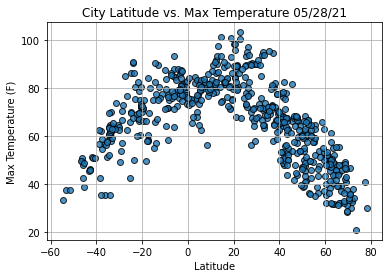

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

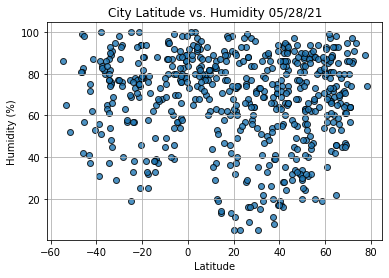

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

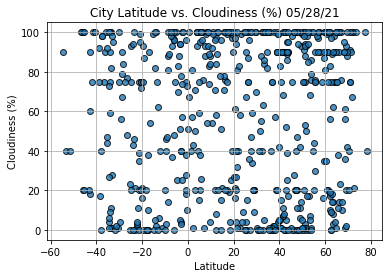

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

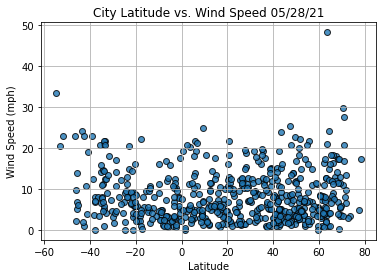

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

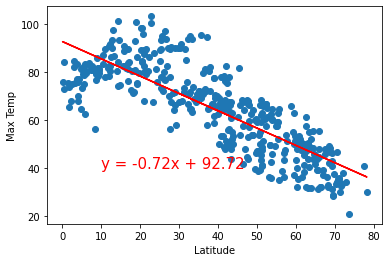

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

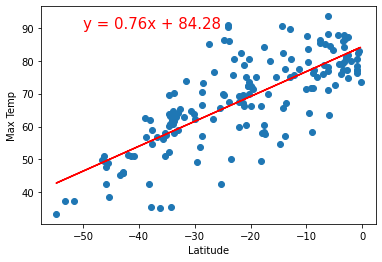

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

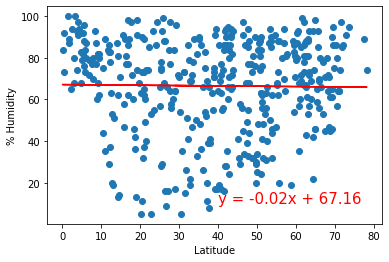

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

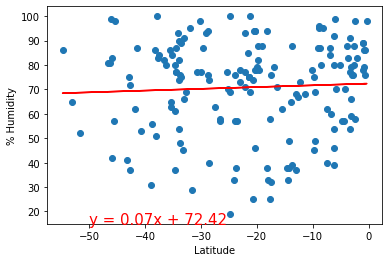

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

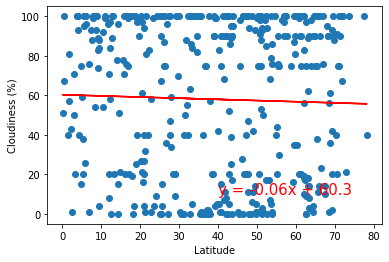

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness (%)', 'Cloudiness (%)',(40,10))

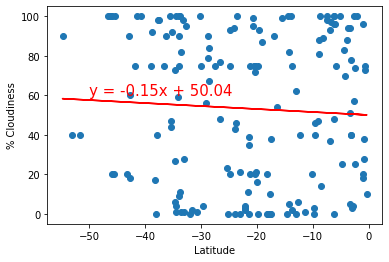

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

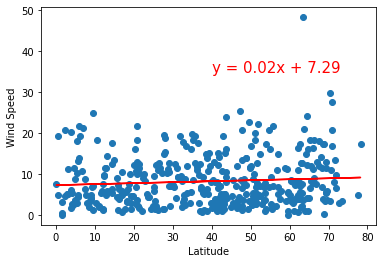

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

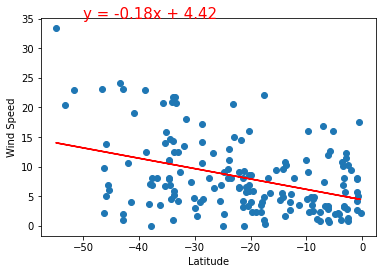

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))